# COVID Government Response Paper Data Analysis

# TO DO:


- [ ] Need to explore the missingness of the Oxford data. Sort the countries by GDP and examine what the missingness matrix looks like. **If you could run imputation on this data then you would have a major leg up on the other paper working on the similar topic. (on to of the other benefits to your paper)**
- [ ] Continue to update this **[file](https://1drv.ms/x/s!AjWX5HOdYY23kf9x5S7g8LKLGlseVg?e=992nsi)** of data source locations 
- [ ] 
- [ ] 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10 ,6
import numpy as np
import seaborn as sns
import datetime
from matplotlib.pyplot import figure
import os
from pathlib import Path
import shutil
import missingno as msno

In [16]:
data_path = '..\Modified Data Sets'
control_data_path = '..\Control Data'
graphics_path = '..\graphics'

# Importing and evaluating the smoking dataset from Our World Data

In [21]:
smk_die_rate = pd.read_excel(f'{control_data_path}\share-deaths-smoking.xlsx', sheet_name = 'death-rate-smoking')
smk_die_proportion = pd.read_excel(f'{control_data_path}\share-deaths-smoking.xlsx', sheet_name = 'share-deaths-smoking')

In [23]:
smk_die_rate = smk_die_rate.loc[smk_die_rate]

,Entity,Code,Year,Deaths - Smoking - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,92.268409
1,Afghanistan,AFG,1991,92.117452
2,Afghanistan,AFG,1992,92.218535
3,Afghanistan,AFG,1993,92.972910
4,Afghanistan,AFG,1994,94.397736
...,...,...,...,...
6463,Zimbabwe,ZWE,2013,164.091901
6464,Zimbabwe,ZWE,2014,156.168063
6465,Zimbabwe,ZWE,2015,150.064224
6466,Zimbabwe,ZWE,2016,144.094646


In [3]:
df = pd.read_excel(f'{data_path}\Final COVID Data Set(Through 2020-09-22).xlsx')

# Descriptive Analysis

In [6]:
df_indexed = df.set_index('date')
# df_indexed.case_count.fillna()

In [7]:
df_indexed.columns

Index(['country', 'case_count', 'death_count', 'school_close', 'work_close',
       'public_events', 'large_gather', 'public_transpo', 'stay_home',
       'domestic_travel', 'internat_travel', 'population',
       'ages_65_and_above_of_total_population', 'female_of_total',
       'diabetes_prevalence_of_population_ages_20_to_79',
       'obese_of_adult_population', 'htn_prevalence',
       'smoking_prevalence_ages_15', 'cancer_prevalence_',
       'hiv_prevalence_of_population_ages_1549', 'copd_dalys_per_100000',
       'sars_experience_0_no_1_yes', 'quarantine_efficiency', 'gov_efficiency',
       'monitoring_and_detection', 'healthcare_readiness',
       'country_vulnerability', 'emergency_preparedness', 'total_score',
       'countrycode', 'gdp_rank', 'gdp_in_mil_us'],
      dtype='object')

> ### Evaluating Stationality

In [18]:
# from statsmodels.tsa.stattools import adfuller
# dftest = adfuller(df_indexed.case_count,autolag='AIC')
# dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'n'])
# for key,value in dftest[4].items():
#     dfoutput[f'Critical Value ({key})']= value
# print(dfoutput)

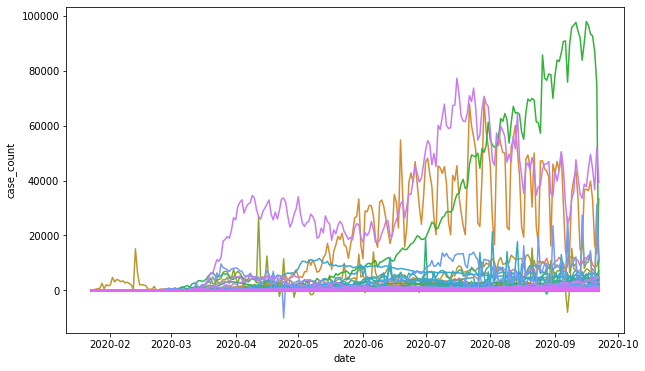

In [8]:
sns.lineplot(x = 'date', y ='case_count', hue = 'country', data = df,legend=False)

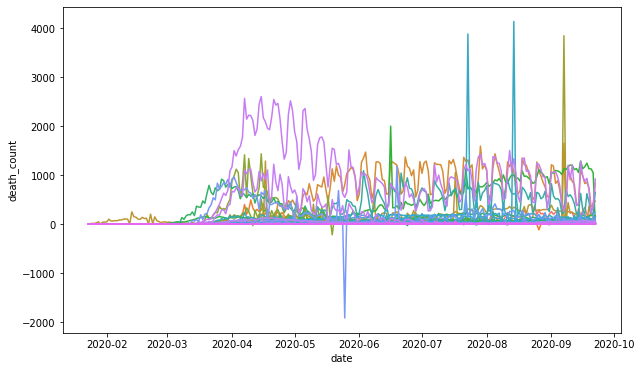

In [9]:
sns.lineplot(x = 'date', y ='death_count', hue = 'country', data = df,legend=False)

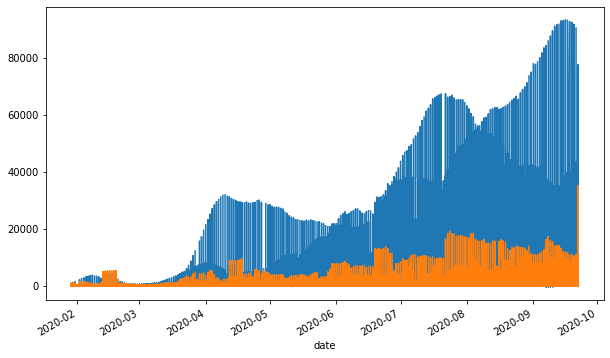

In [13]:
rolmean = df_indexed.case_count.rolling(window=7).mean()

rolstd = df_indexed.case_count.rolling(window=7).std()
rolmean.plot()
rolstd.plot()

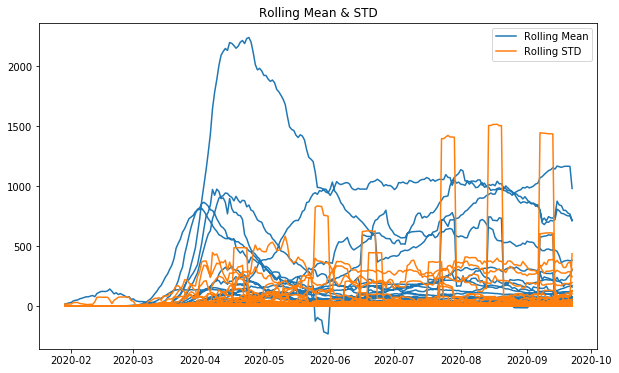

In [12]:
rolmean = df_indexed.death_count.rolling(window=7).mean()

rolstd = df_indexed.death_count.rolling(window=7).std()
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label='Rolling STD')

# death = plt.plot(df_indexed.death_count, label = 'Death Counts')
plt.legend(loc='best')
plt.title('Rolling Mean & STD')
# rolstd.plot()
plt.show()

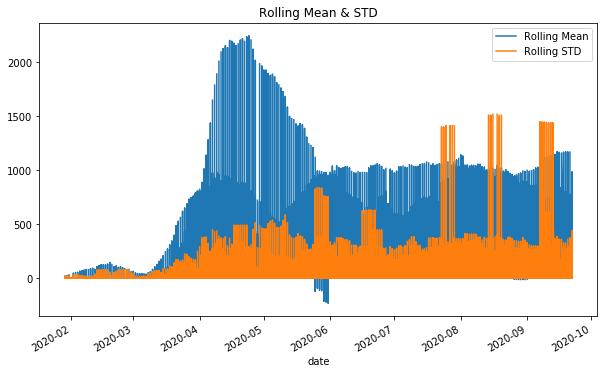

In [36]:
rolmean = df_indexed.death_count.rolling(window=7).mean()

rolstd = df_indexed.death_count.rolling(window=7).std()
rolmean.plot( label='Rolling Mean')
rolstd.plot( label='Rolling STD')

# death = plt.plot(df_indexed.death_count, label = 'Death Counts')
plt.legend(loc='best')
plt.title('Rolling Mean & STD')
# rolstd.plot()
plt.show()

>### Missingness Analysis

>> ##### Missingness Sorted by GDP Rank

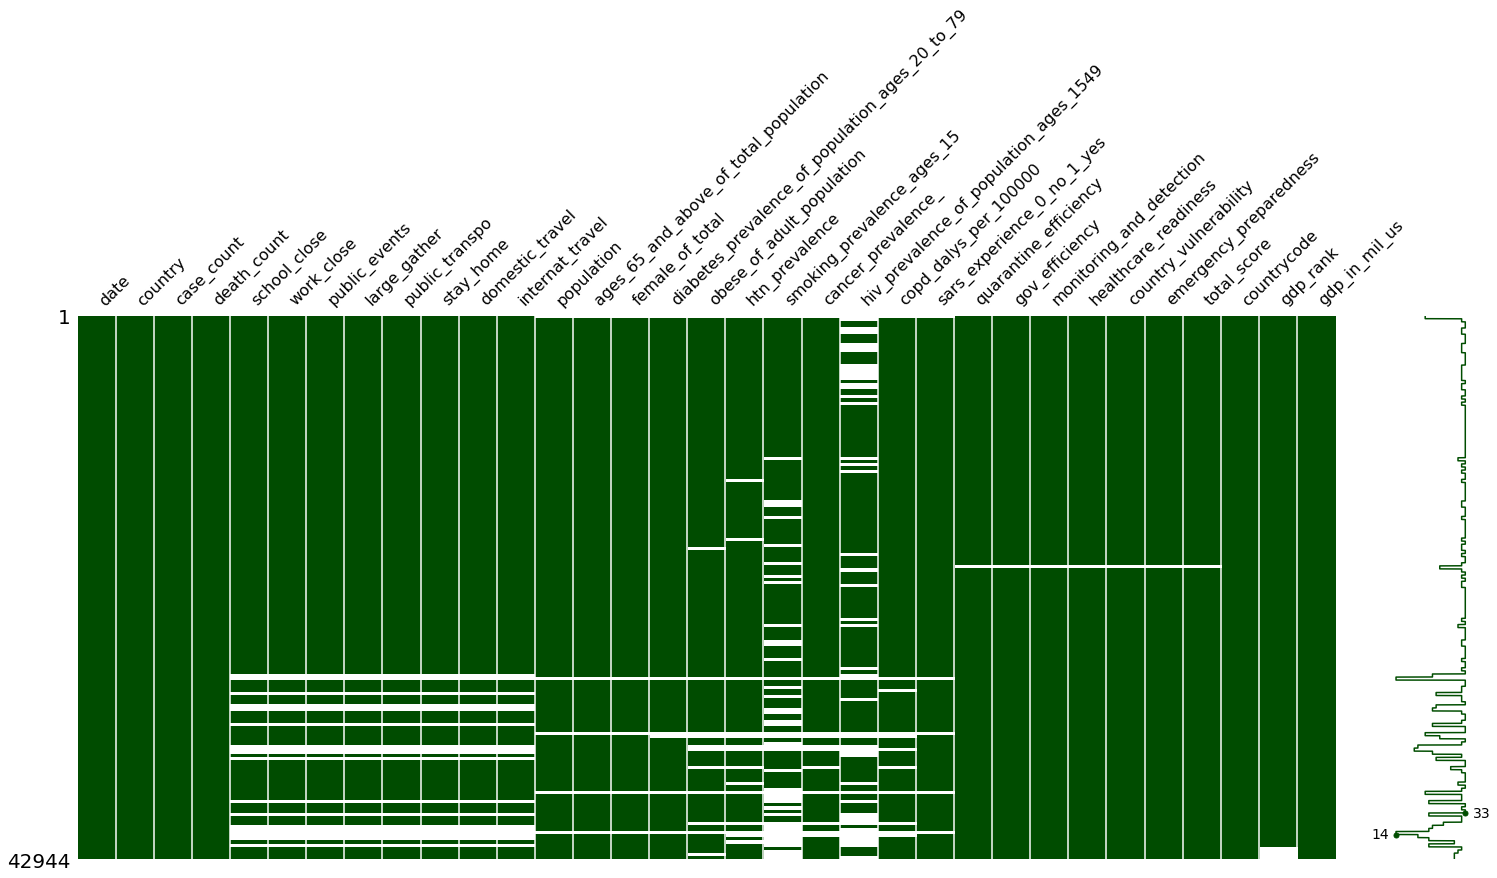

In [82]:
df.sort_values(by='gdp_rank',inplace=True)
df_nomiss = df.loc[~df.case_count.isnull()].copy().replace('nan',np.nan)
msno.matrix(df_nomiss, color=(0.0, 0.30, 0.00))

>> ##### Missingness Sorted by Population

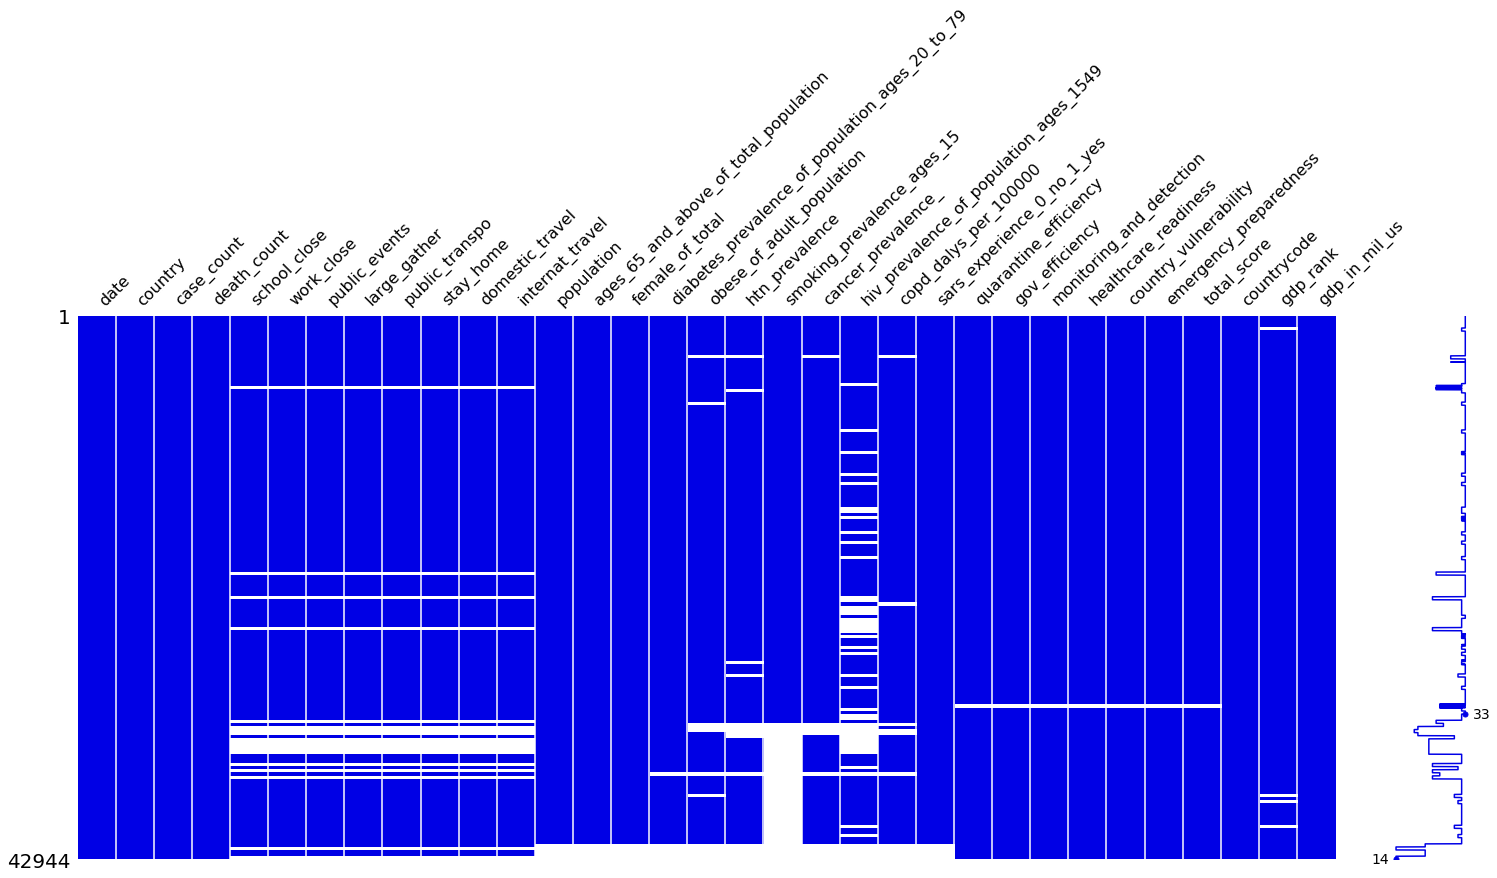

In [63]:
df_nomiss.sort_values(by='smoking_prevalence_ages_15',inplace=True)
msno.matrix(df_nomiss, color=(0.0, 0.00, 0.90))

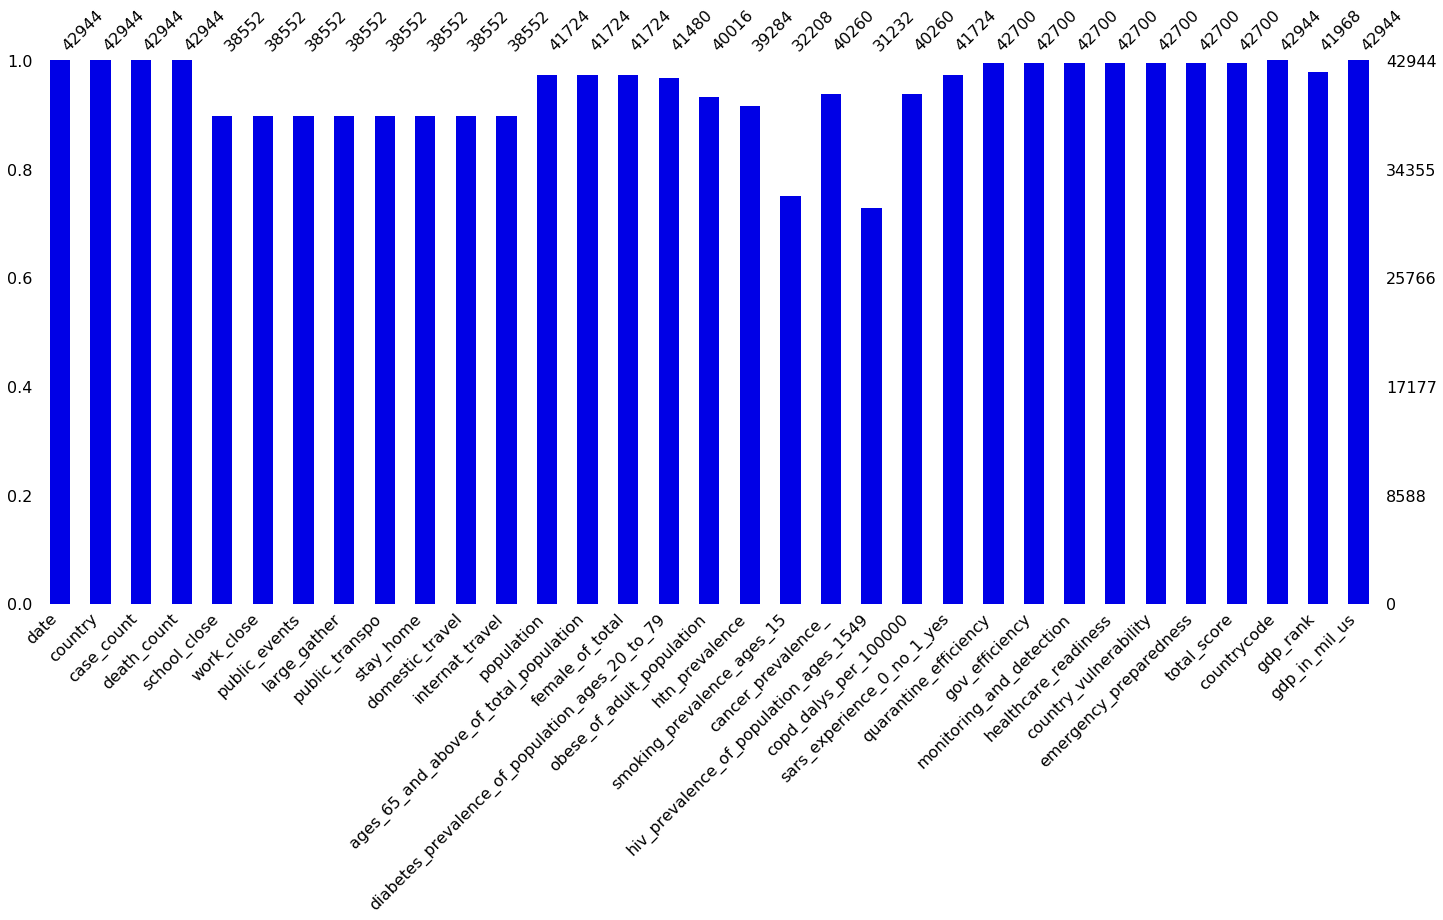

In [80]:
msno.bar(df_nomiss, color=(0.0, 0.00, 0.90))

In [62]:
df.columns

Index(['date', 'country', 'case_count', 'death_count', 'school_close',
       'work_close', 'public_events', 'large_gather', 'public_transpo',
       'stay_home', 'domestic_travel', 'internat_travel', 'population',
       'ages_65_and_above_of_total_population', 'female_of_total',
       'diabetes_prevalence_of_population_ages_20_to_79',
       'obese_of_adult_population', 'htn_prevalence',
       'smoking_prevalence_ages_15', 'cancer_prevalence_',
       'hiv_prevalence_of_population_ages_1549', 'copd_dalys_per_100000',
       'sars_experience_0_no_1_yes', 'quarantine_efficiency', 'gov_efficiency',
       'monitoring_and_detection', 'healthcare_readiness',
       'country_vulnerability', 'emergency_preparedness', 'total_score',
       'countrycode', 'gdp_rank', 'gdp_in_mil_us'],
      dtype='object')

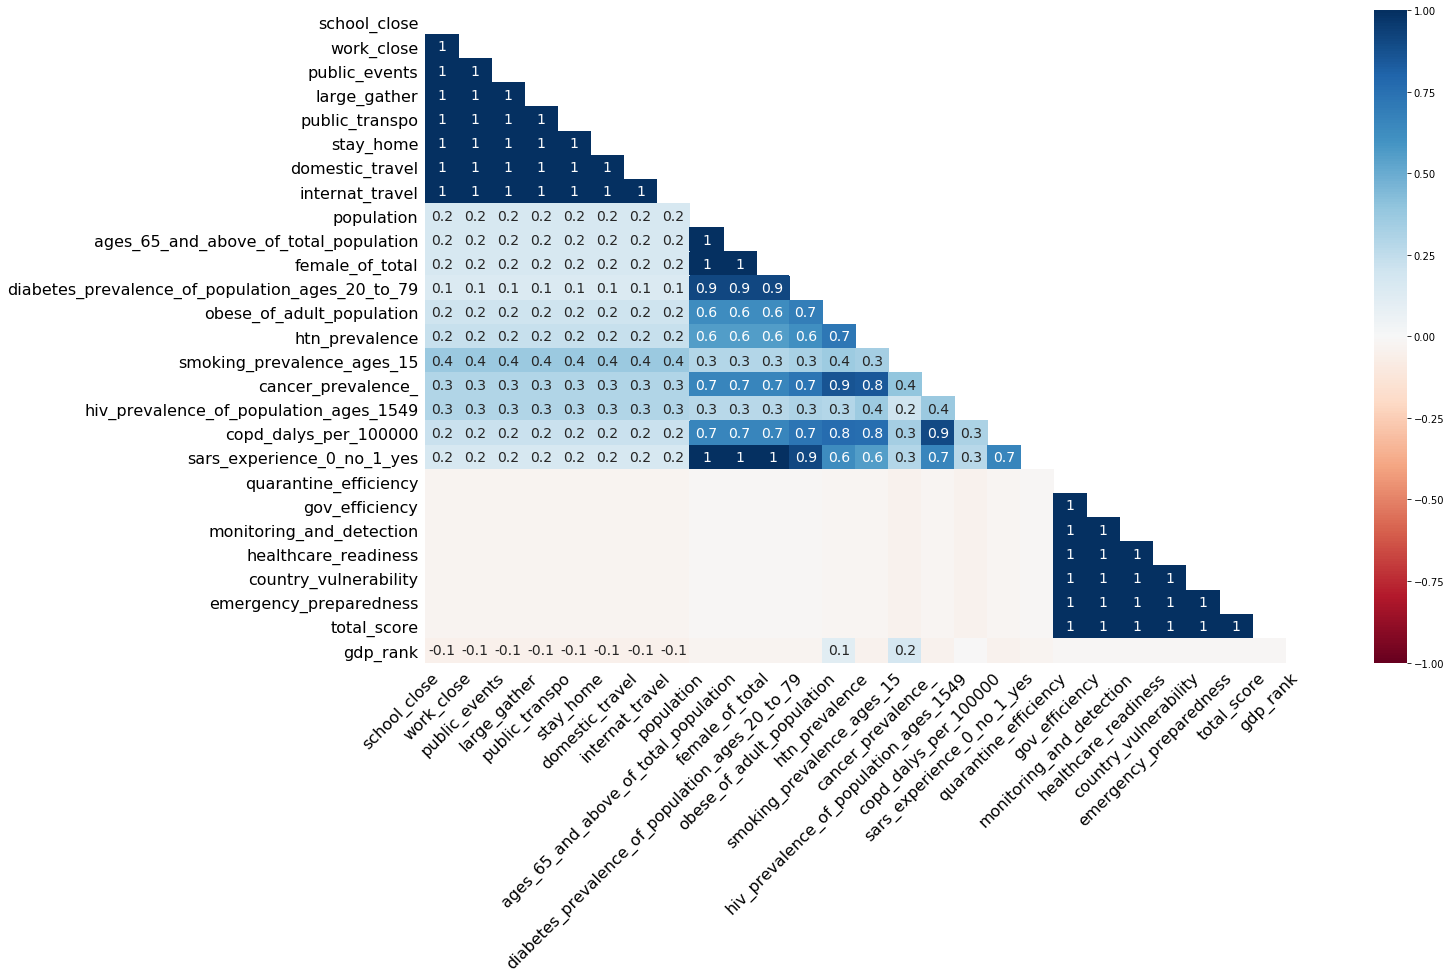

In [64]:
msno.heatmap(df_nomiss)

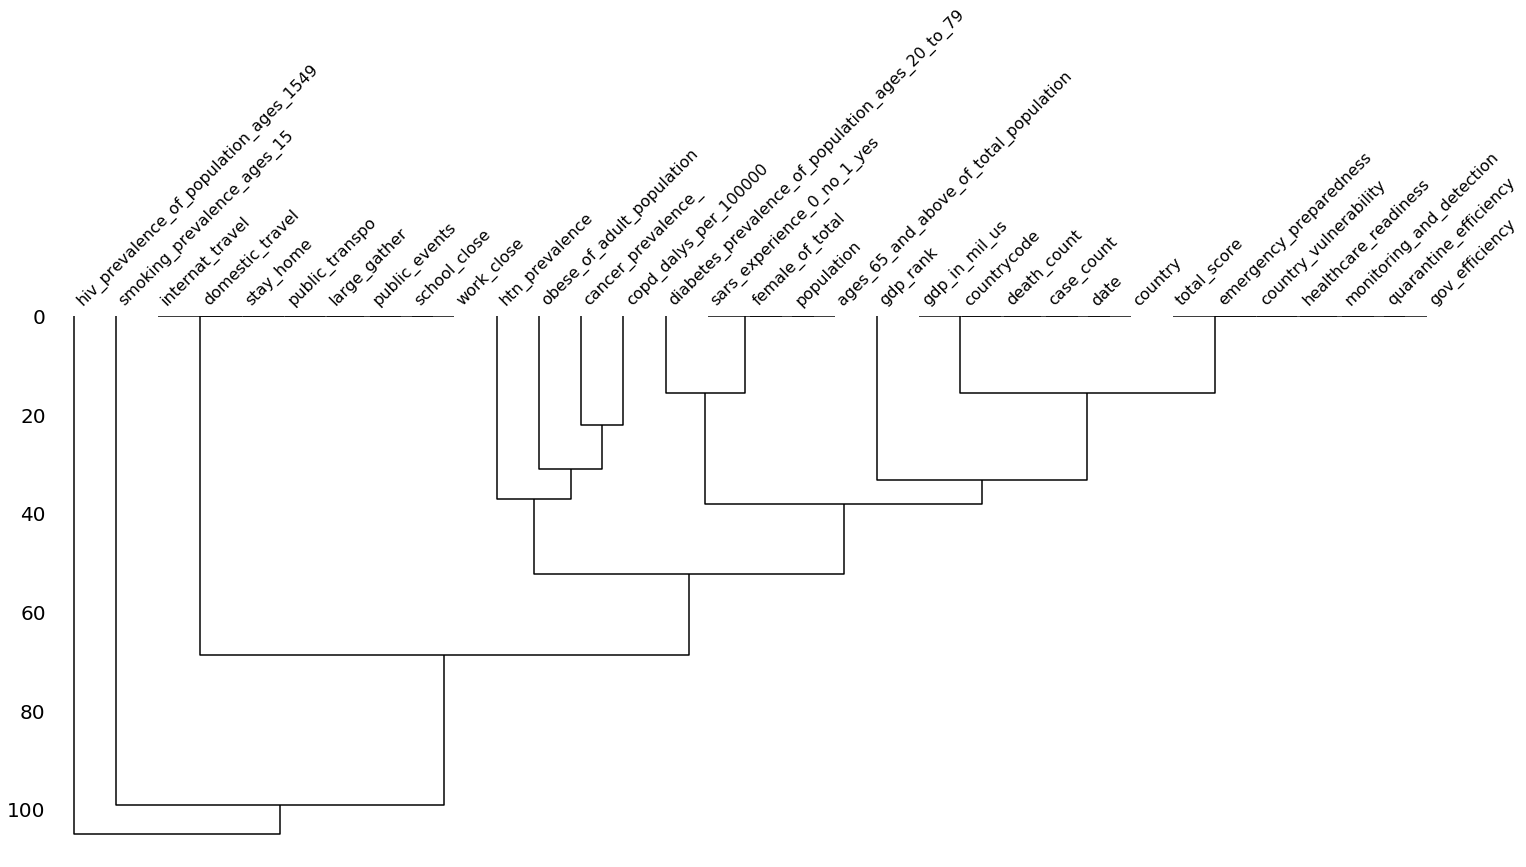

In [81]:
msno.dendrogram(df_nomiss)

>### Distribution Analysis

# Modeling Analysis

>> Model specification

\begin{equation}
\tag{2.13}
stack.loss_i = \alpha_n + \beta air_i + e_i, \text{ where } e_i \sim \text{N}(0,\sigma^2) 
\end{equation}

\begin{equation}
\tag{2.7}
\begin{bmatrix}stack.loss_1\\stack.loss_2\\stack.loss_3\\stack.loss_4\end{bmatrix}
= 
\begin{bmatrix}
\alpha&\beta&0&0&0\\
\alpha&0&\beta&0&0\\
\alpha&0&0&\beta&0\\
\alpha&0&0&0&\beta
\end{bmatrix}
\begin{bmatrix}1\\air_1\\air_2\\air_3\\air_4\end{bmatrix}
+
\begin{bmatrix}e_1\\e_2\\e_3\\e_4\end{bmatrix}
\end{equation}

\[\begin{equation}\tag{2.7}\begin{bmatrix}stack.loss_1\\stack.loss_2\\stack.loss_3\\stack.loss_4\end{bmatrix}=\begin{bmatrix}\alpha&\beta&0&0&0\\ \alpha&0&\beta&0&0\\ \alpha&0&0&\beta&0\\ \alpha&0&0&0&\beta\end{bmatrix}
\end{equation}]